# PROYECTO1-ETAPA1

**INTEGRANTES**
- Juan Sebastian Sanchez Delgado - 202013577
- Miguel Angel Cardenas - 202010998
- Santiago Paeres Gonzalez - 201425176

## 1. Entendimiento y preparacion de los datos


In [2]:
import numpy as np
import pandas as pd

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

In [658]:
import warnings
warnings.filterwarnings("ignore")

In [659]:
# Descargando stopwords
nltk.download("punkt")
nltk.download("stopwords")
stop_words = stopwords.words("spanish")

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/santiagopaeres/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/santiagopaeres/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [660]:
df_ods = pd.read_csv("./cat_345.csv", sep=';', encoding = 'utf8')

In [661]:
df_ods.shape

(3000, 2)

In [662]:
df_ods.dtypes

Textos_espanol    object
sdg                int64
dtype: object

In [663]:
df_ods.sample(5)

,Textos_espanol,sdg
2170,Gran parte de la formación en habilidades para...,5
2759,"Además, tanto las víctimas masculinas como las...",5
2687,Los enfoques deben abordar tanto las barreras ...,5
2874,Cuando los hogares no pueden acceder a suficie...,5
678,El desarrollo de la población y la gama cambia...,3


### 1.1 Completitud

In [664]:
# Se muestra la proporcion de registros con valores nulos con respecto a la totalidad de registros
df_ods.isnull().sum() / df_ods.shape[0]

Textos_espanol    0.0
sdg               0.0
dtype: float64

In [665]:
# Cálculo de porcentaje de valores nulos por columna
((df_ods.isnull().sum()/df_ods.shape[0])).sort_values(ascending=False)

Textos_espanol    0.0
sdg               0.0
dtype: float64

### 1.2 Unicidad

In [666]:
# Se revisa el número de filas duplicadas
df_ods.duplicated(keep = False).sum()

0

### 1.3 Consistencia

In [667]:
df_ods["Textos_espanol"] = df_ods["Textos_espanol"].astype(str)

### 1.4 Validez

In [668]:
df_ods['sdg'].value_counts()

sdg
3    1000
4    1000
5    1000
Name: count, dtype: int64

In [669]:
df_ods['Textos_espanol'].value_counts()

Textos_espanol
Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.                                         

In [670]:
df_ods.sample(20)

,Textos_espanol,sdg
1771,No se muestran los resultados de Yakarta (Indo...,4
1760,Los exámenes son una característica común de l...,4
443,Las enfermeras de atención primaria realizaron...,3
2968,Los maridos con mayor poder de negociación (re...,5
923,"En estas zonas, el acceso adecuado al servicio...",3
1662,El impacto del tiempo de instrucción adicional...,4
288,"Las recientes reformas en Italia y, en particu...",3
2737,Las mujeres políticas denuncian que el acoso s...,5
2706,Las mujeres migrantes mayores pueden enfrentar...,5
1409,"Además, los valores judíos definen la cultura ...",4


In [671]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas ...",3
10,Dos encuestados seÃ±alaron que no existe un or...,3
26,"También promueve mejoras en la prevención, el ...",3
30,La falta de programas completos de acreditació...,3
46,Dado el aumento de enfermedades crónicas como ...,3
...,...,...
2984,Las actividades empresariales siguen viéndose ...,5
2990,La Agenda Nacional de Jordania 2006-15 estable...,5
2991,"En la mayoría de los países de la CAO, los fun...",5
2996,"Por el contrario, el porcentaje de hogares en ...",5


In [672]:
# Remplaza los caracteres erroneos con su equivalencia pero en UTF-8
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã¡', 'á')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã©', 'é')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã³', 'ó')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ãº', 'ú')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã±', 'ñ')
df_ods['Textos_espanol'] = df_ods['Textos_espanol'].str.replace('Ã', 'í')

In [673]:
df_ods[df_ods['Textos_espanol'].str.contains('Ã')]

,Textos_espanol,sdg


In [674]:
df_ods.sample(10)

,Textos_espanol,sdg
2862,Este refuerzo de la coordinación interna no só...,5
1264,Es necesario hacer mayor hincapié en las compe...,4
1284,Los análisis basados ​​en los casos de otros p...,4
1426,"En 2016, las tasas de matriculación entre los ...",4
1144,El nivel de educación terciaria en Polonia tam...,4
2253,Esta disposición debería aumentar el número de...,5
1370,Esta cooperación entre la asignatura y los pro...,4
1127,Los paquetes se revisan regularmente a través ...,4
2881,"Además, los países pueden considerar hacer que...",5
2480,Este capítulo busca proporcionar contexto y pe...,5


### 1.5 Transformacion

In [675]:
# Se dividen los datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_ods["Textos_espanol"], df_ods["sdg"], test_size=0.3, stratify=df_ods["sdg"], random_state=1)

In [676]:
X_train.shape, X_test.shape

((2100,), (900,))

In [677]:
pd.Series(y_train).value_counts(normalize=True)

sdg
4    0.333333
3    0.333333
5    0.333333
Name: proportion, dtype: float64

In [678]:
pd.Series(y_test).value_counts(normalize=True)

sdg
3    0.333333
4    0.333333
5    0.333333
Name: proportion, dtype: float64

In [679]:
bow = CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [680]:
X_bow = bow.fit_transform(X_train)

In [681]:
print("Vocabulary size:", len(bow.vocabulary_))

Vocabulary size: 15134


## 2. Modelado y evaluacion

### 2.1 Entrenando Modelo con BoW y Random Forest classifier (Juan Sebastian Sanchez Delgado)

In [682]:
bow_model = RandomForestClassifier(random_state=2)

In [683]:
bow_model.fit(X_bow, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

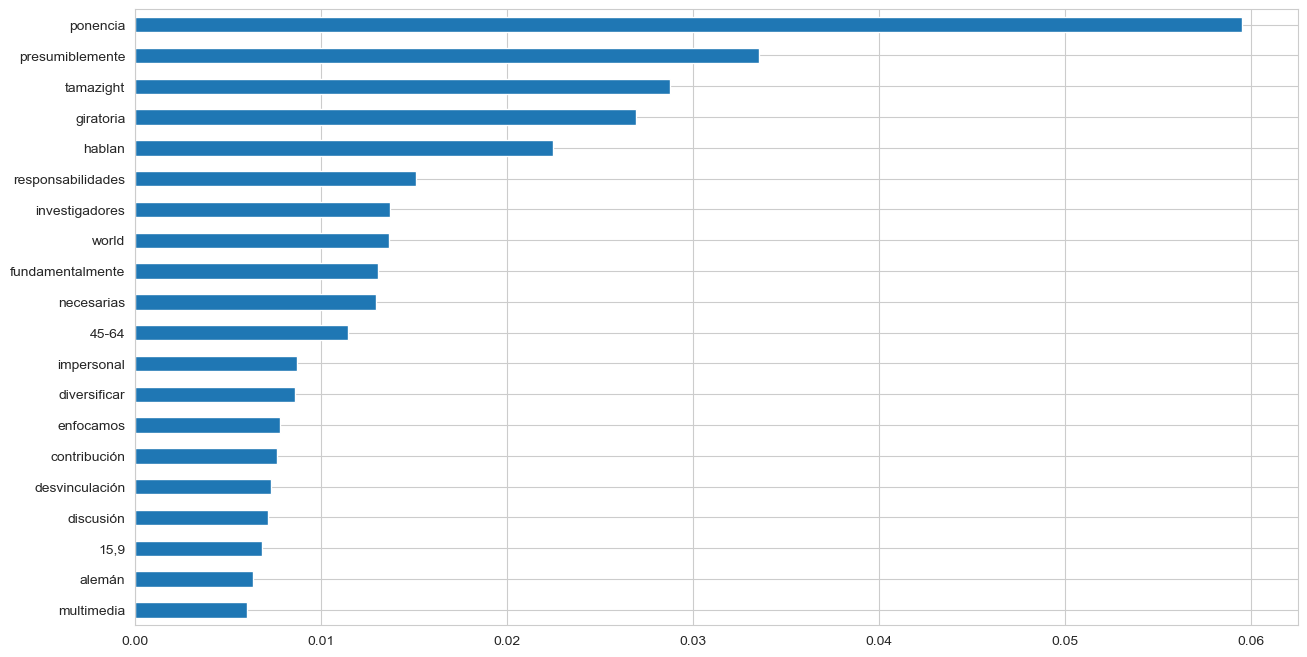

In [684]:
# Se muestra la importancia de algunas palabras para determinar que tan relevante es para tomar una decision para el modelo
pd.Series(bow_model.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 8))

In [685]:
bow_estimators = bow_model.estimators_
print("Numero de arboles de decision:", len(bow_estimators))
print("Profundidad de los arboles (mean):", np.mean([tree.get_depth() for tree in bow_estimators]))

Numero de arboles de decision: 100
Profundidad de los arboles (mean): 97.14


In [686]:
y_train_bow_predict = bow_model.predict(X_bow)
y_test_bow_predict = bow_model.predict(bow.transform(X_test))

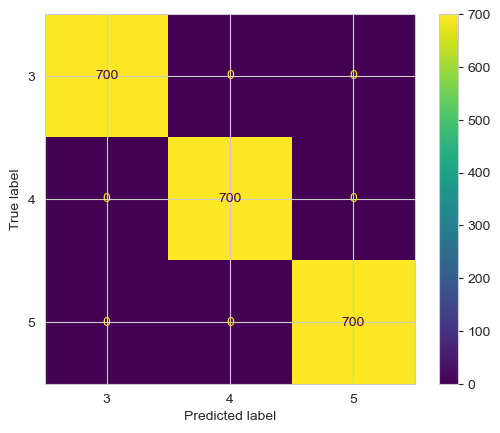

In [687]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_bow_predict)

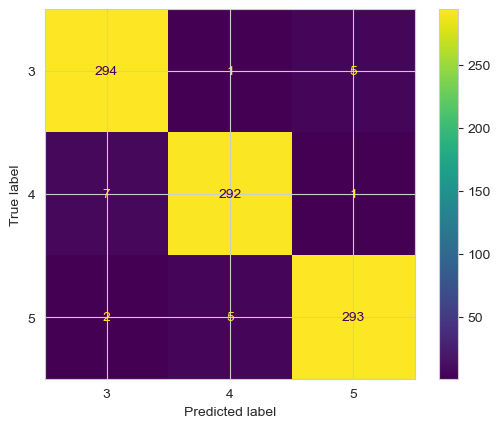

In [688]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_bow_predict)

In [689]:
print("Precision:", precision_score(y_train, y_train_bow_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_bow_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_bow_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [690]:
print("Precision:", precision_score(y_test, y_test_bow_predict, average='micro' ))
print("Recall:", recall_score(y_test, y_test_bow_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_bow_predict, average='micro'))

Precision: 0.9766666666666667
Recall: 0.9766666666666667
F1: 0.9766666666666667


### 2.2 Entrenando modelo con TF-IDF (Santiago Paeres Gonzalez)

In [691]:
tfidf = TfidfVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)

In [692]:
X_tfidf = tfidf.fit_transform(X_train)

In [693]:
print("Vocabulary size:", len(tfidf.vocabulary_))

Vocabulary size: 15134


In [694]:
# Obtén una porción limitada de la matriz X_tfidf
filas_a_mostrar = 100
columnas_a_mostrar = 100
ejemplo = X_tfidf[:filas_a_mostrar, :columnas_a_mostrar]
# Convierte la porción Limitada en un DataFrame de Pandas para una mejor visualización
df_ejemplo = pd.DataFrame (ejemplo.toarray(), columns=tfidf.get_feature_names_out ()[:columnas_a_mostrar])
df_ejemplo

,!,#,$,%,&,','','barómetro,'club,'conocimiento,...,.las,/,//assets.publishing.service.gov.uk/media/57a08abaed915d3cfd0008e0/birdthistle,//data.uis.unesco.org/l,//sdg4monitoring.uis.unesco.org,//timss.bc.edu,//www,//www.oecd.org/dev/wp,//www.ofsted.gov.uk/about-us,//www.wcl.american.edu/faculty/flynn/
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.090918,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,0.0,0.0,0.0,0.000000,0.0,0.0,0.058743,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [695]:
tfidf_model = RandomForestClassifier(random_state=2)

In [696]:
tfidf_model.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=2)

<Axes: >

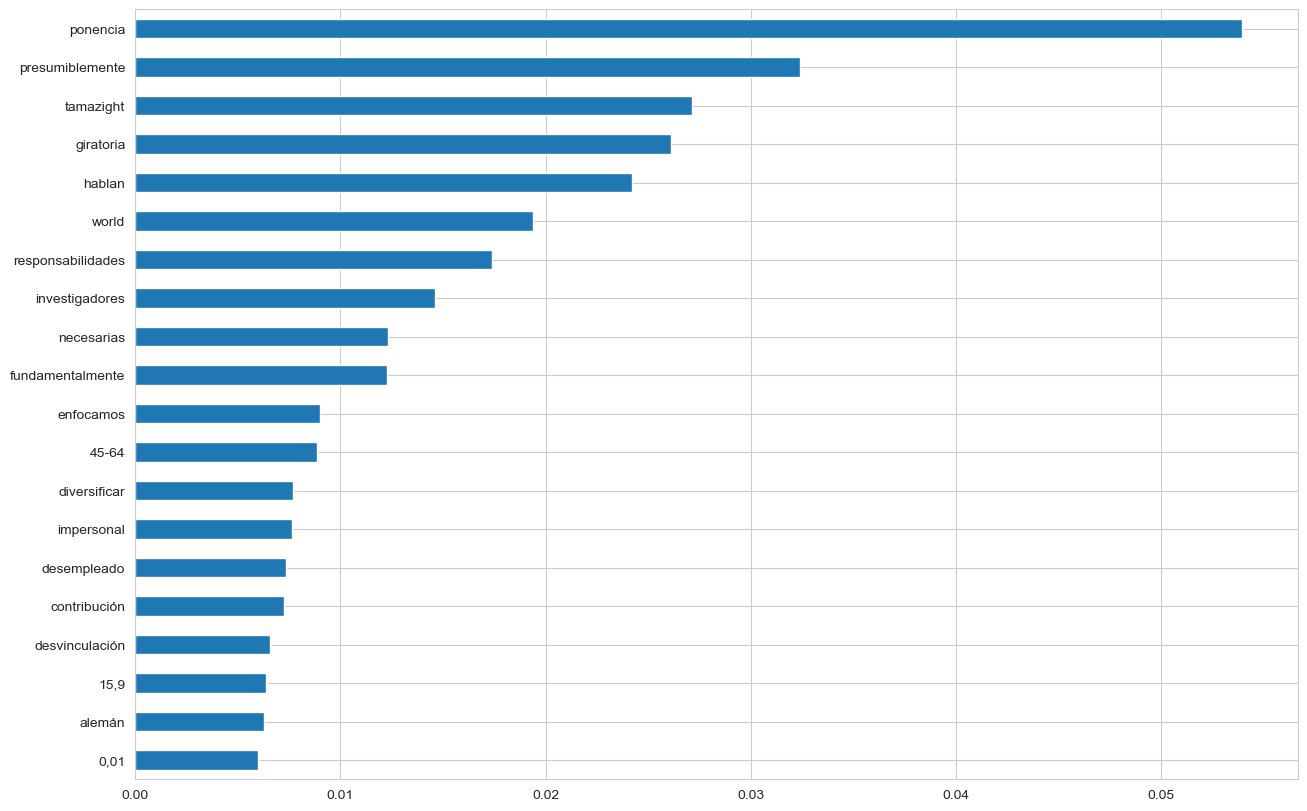

In [697]:
pd.Series(tfidf_model.feature_importances_, index=tfidf.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

In [698]:
tfidf_estimators = tfidf_model.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 94.37


In [699]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test))

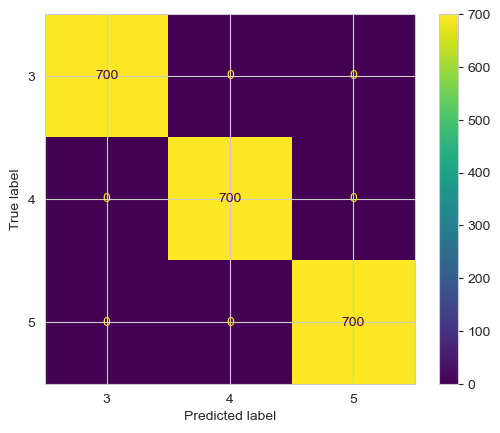

In [700]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

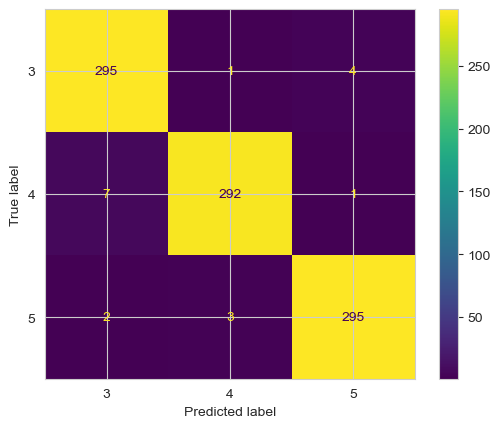

In [701]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [702]:
print("Precision:", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_tfidf_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [703]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision: 0.98
Recall: 0.98
F1: 0.98


Se pasa el modelo anteriormente planteado de TF-IDF a un pipeline para poder realizar las predicciones más adelante:

In [704]:
# Crear el pipeline
pipeline_tfidf = Pipeline([
    ('tfidf', tfidf),  # Etapa de TF-IDF
    ('classifier', tfidf_model)  # Etapa de modelo de clasificación
])


In [705]:
pipeline_tfidf.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x7fc348d26700>)),
                ('classifier', RandomForestClassifier(random_state=2))])

In [706]:
y_train_tfidf_predict = tfidf_model.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model.predict(tfidf.transform(X_test))

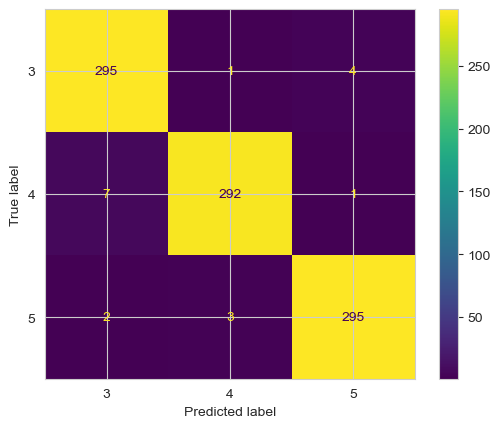

In [707]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

In [708]:
print("Precision:", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision: 0.98
Recall: 0.98
F1: 0.98


#### 2.2.1 Seleccionando un posible mejor modelo

In [709]:
pipeline = Pipeline(steps = [
    ("vectorizer", CountVectorizer(tokenizer=word_tokenize, stop_words=stop_words, lowercase=True)),
    ("classifier", RandomForestClassifier(random_state=4))
])

In [489]:
param_grid = {
    "vectorizer": [TfidfVectorizer(max_df=0.5,tokenizer=word_tokenize, stop_words=stop_words)],
    "vectorizer__lowercase": [True, False],
    "classifier__n_estimators": [30, 50],
    "classifier__max_depth": [25, 50]
}

In [76]:
search = RandomizedSearchCV(pipeline, param_grid, n_iter=15, scoring=["precision", "recall", "f1"], refit="f1", cv=30, return_train_score=True, verbose=1, random_state=5)

In [77]:
search.fit(X_train, y_train)

Fitting 30 folds for each of 8 candidates, totalling 240 fits


RandomizedSearchCV(cv=30,
                   estimator=Pipeline(steps=[('vectorizer',
                                              CountVectorizer(stop_words=['de',
                                                                          'la',
                                                                          'que',
                                                                          'el',
                                                                          'en',
                                                                          'y',
                                                                          'a',
                                                                          'los',
                                                                          'del',
                                                                          'se',
                                                                          'las',
                                

In [78]:
search.best_params_

{'vectorizer__lowercase': True,
 'vectorizer': TfidfVectorizer(max_df=0.5,
                 stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                             'del', 'se', 'las', 'por', 'un', 'para', 'con',
                             'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                             'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                             'porque', ...],
                 tokenizer=<function word_tokenize at 0x7fc348d26700>),
 'classifier__n_estimators': 30,
 'classifier__max_depth': 25}

In [81]:
search.best_estimator_

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_df=0.5,
                                 stop_words=['de', 'la', 'que', 'el', 'en', 'y',
                                             'a', 'los', 'del', 'se', 'las',
                                             'por', 'un', 'para', 'con', 'no',
                                             'una', 'su', 'al', 'lo', 'como',
                                             'más', 'pero', 'sus', 'le', 'ya',
                                             'o', 'este', 'sí', 'porque', ...],
                                 tokenizer=<function word_tokenize at 0x7fc348d26700>)),
                ('classifier',
                 RandomForestClassifier(max_depth=25, n_estimators=30,
                                        random_state=4))])

In [82]:
y_train_search_predict = search.best_estimator_.predict(X_train)
y_test_search_predict = search.best_estimator_.predict(X_test)

In [83]:
print("Precision:", precision_score(y_train, y_train_search_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_search_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_search_predict, average='micro'))

Precision: 0.9966666666666667
Recall: 0.9966666666666667
F1: 0.9966666666666667


In [84]:
print("Precision:", precision_score(y_test, y_test_search_predict, average='micro'))
print("Recall:", recall_score(y_test, y_test_search_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_search_predict, average='micro'))

Precision: 0.9533333333333334
Recall: 0.9533333333333334
F1: 0.9533333333333334


### 2.3 Entrenando modelo con Gradient Boosting (Miguel Angel Cardenas) 

In [710]:
gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [711]:
gb_classifier.fit(X_bow, y_train)

GradientBoostingClassifier(random_state=42)

<Axes: >

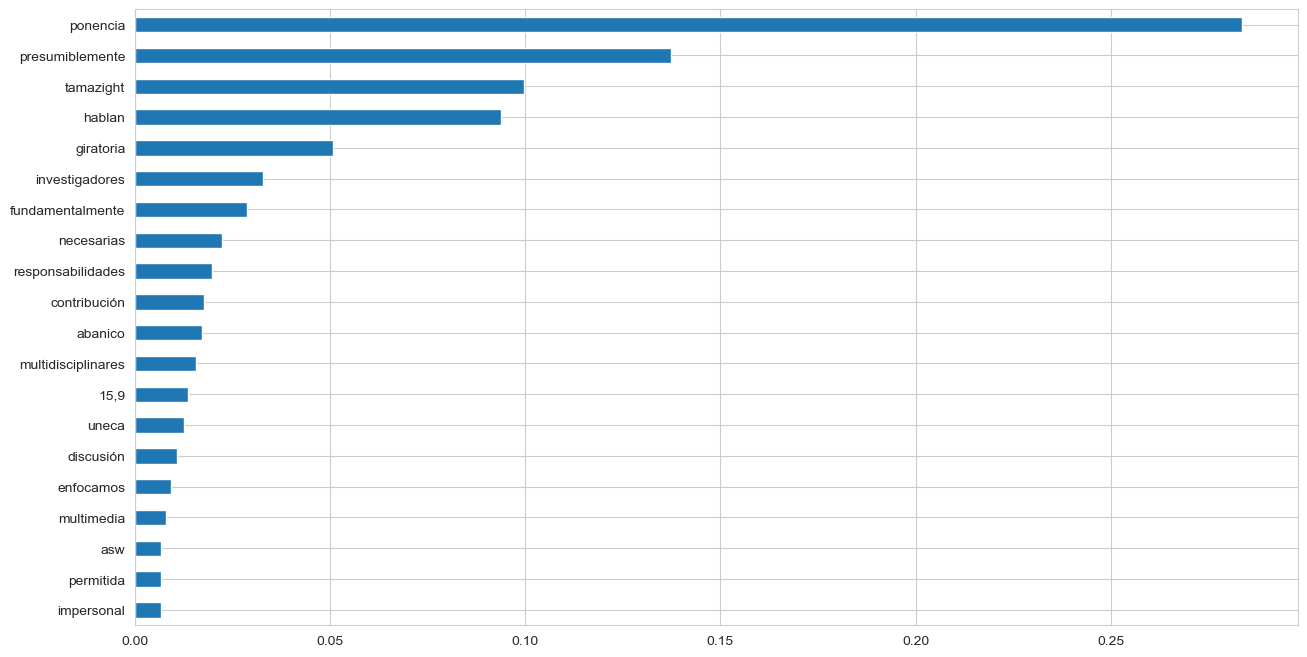

In [712]:
pd.Series(gb_classifier.feature_importances_, index=bow.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 8))

In [713]:
gb_estimators = gb_classifier.estimators_

# Imprime el número de árboles
print("Número de árboles de decisión:", len(gb_estimators))

# Calcula la profundidad promedio de los árboles
depths = [tree[0].tree_.max_depth for tree in gb_estimators]
print("Profundidad de los árboles (media):", np.mean(depths))

Número de árboles de decisión: 100
Profundidad de los árboles (media): 3.0


In [714]:
y_train_gb_predict = gb_classifier.predict(X_bow)

# Realiza predicciones en el conjunto de prueba
y_test_gb_predict = gb_classifier.predict(bow.transform(X_test))

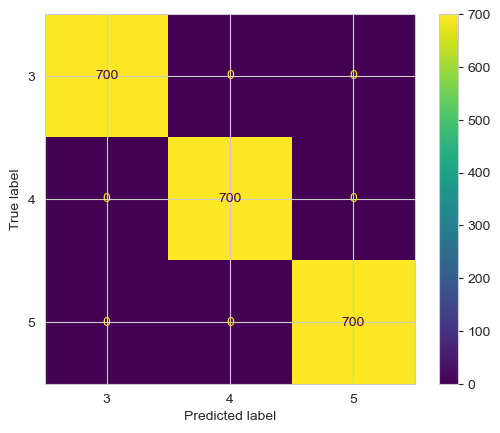

In [715]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_gb_predict)

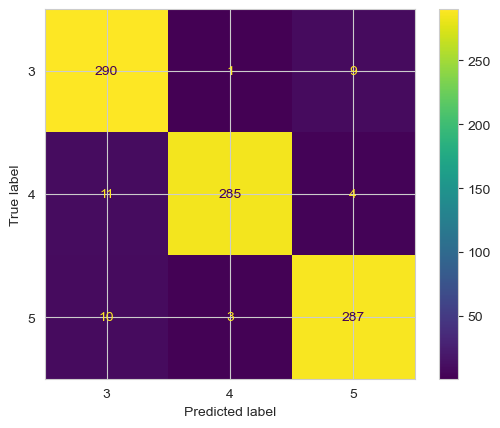

In [716]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_gb_predict)

In [717]:
print("Precision:", precision_score(y_train, y_train_gb_predict, average='micro'))
print("Recall:", recall_score(y_train, y_train_gb_predict, average='micro'))
print("F1:", f1_score(y_train, y_train_gb_predict, average='micro'))

Precision: 1.0
Recall: 1.0
F1: 1.0


In [718]:
print("Precision:", precision_score(y_test, y_test_gb_predict, average='micro' ))
print("Recall:", recall_score(y_test, y_test_gb_predict, average='micro'))
print("F1:", f1_score(y_test, y_test_gb_predict, average='micro'))

Precision: 0.9577777777777777
Recall: 0.9577777777777777
F1: 0.9577777777777777


## 3. Generacion de Predicciones

### 3.1 Exportación del Modelo

In [719]:
import joblib

filename_model = "tfidf_model.joblib"
filename_transform = "tfidf_transform.pkl"

# Guarda el modelo en un archivo
joblib.dump(pipeline_tfidf, filename_model)
joblib.dump(tfidf, filename_transform)

['tfidf_transform.pkl']

### 3.2 Generación de las Predicciones

In [15]:
df_ods_new = pd.read_csv("./SinEtiquetatest_cat_345.csv", sep=';', encoding = 'utf8')

In [16]:
datos_pred = df_ods_new['Textos_espanol']

In [17]:
datos_pred.sample(5)

186     Las políticas para promover un entorno escolar...
1226    Sin embargo, solo muy pocos países vinculan lo...
484     En tales casos, brindar mejor información sobr...
1298    Parte de la razón de esto es que aún no hemos ...
960     El aumento de la movilidad internacional de lo...
Name: Textos_espanol, dtype: object

In [723]:
# Remplaza los caracteres erroneos con su equivalencia pero en UTF-8
df_ods_new['Textos_espanol'] = df_ods_new['Textos_espanol'].str.replace('Ã¡', 'á')
df_ods_new['Textos_espanol'] = df_ods_new['Textos_espanol'].str.replace('Ã©', 'é')
df_ods_new['Textos_espanol'] = df_ods_new['Textos_espanol'].str.replace('Ã³', 'ó')
df_ods_new['Textos_espanol'] = df_ods_new['Textos_espanol'].str.replace('Ãº', 'ú')
df_ods_new['Textos_espanol'] = df_ods_new['Textos_espanol'].str.replace('Ã±', 'ñ')
df_ods_new['Textos_espanol'] = df_ods_new['Textos_espanol'].str.replace('Ã', 'í')

In [724]:
# Carga el modelo desde el archivo
tfidf_model = joblib.load(filename_model)
tfidf = joblib.load(filename_transform)

In [725]:
X_pred = tfidf.transform(datos_pred)
y_test_search_predict = tfidf_model.predict(datos_pred)

In [726]:
y_test_search_predict

array([4, 3, 5, ..., 4, 3, 4])

In [727]:
df_ods_new['sdg'] = y_test_search_predict[0:]

In [728]:
df_ods_new

,Textos_espanol,sdg
0,Se basa en los nueve años de educación básica ...,4
1,"En la última década, y en particular desde 201...",3
2,"Así, por ejemplo, el estigma asociado a los be...",5
3,Hay muchos profesores no cualificados en las e...,4
4,A raíz de su preocupación por el hecho de que ...,3
...,...,...
1754,O puede darse de baja llamando a XXXXXXX o vis...,3
1755,Considere establecer o fortalecer la capacidad...,5
1756,"Sin embargo, la calidad general del entorno de...",4
1757,"Cada vez con más frecuencia, los traficantes d...",3


In [729]:
# Por último, es posible guardar un Dataframe en forma de CSV
df_ods_new.to_csv("Predicciones_ODS.csv")

## 4. Resultados

### 4.1 Escogiendo el Modelo mas adecuado

Aunque en un escenario ideal se podría encontrar el modelo de clasificación óptimo probando diferentes combinaciones de hiperparámetros, tanto como para los vectorizadores como para el Random Forest, para los tres algoritmos propuestos (Bag of Words, TF-IDF y Gradient Boosting), fue evidente en el intento en la seccion de `Seleccionando un posible mejor modelo` de que esta tarea es sumamente tediosa y conlleva un gasto computacional significativo por la forma en la que los algoritmos como RandomizedSearchCV o la optimización Bayesiana funcionan. Además, existen muchísimas posibles combinaciones de conjuntos de hiperparametros que se le pueden pasar a RandomizedSearchCV por lo que no es tan facil encontrar el conjunto de hiperparámetros que resulte en una busqueda exitosa.  

Sin embargo, con los hiperparámetros escogidos en el pipeline y utilizando RandomizedSearchCV NO se llegó a un mejor resultado que el utilizado originalmente, pues sin hacer uso de RandomizedSearchCV la puntuación F1 del modelo de TF-IDF fue de 0.98, mientras que con RandomizedSearchCV fue de 0.95 para los datos de prueba. Claramente, se pudieron haber escogido mejores conjuntos de hiperparámetros para probar en la busqueda, pero esto va más alla del alcance de este proyecto, además se llegó a valores aceptables de precision, recuperación (recall) y puntuación F1.

Asi pues, comparando los tres modelos escogidos en sus metricas de precision, recall (recuperación) y puntuación F1:

In [730]:
# Crear un diccionario con los nombres de los modelos y sus valores de F1
data = {
    'Modelo': ['BoW', 'TF-IDF', 'Gradient Boosting'],
    'Precisión': [ precision_score(y_test, y_test_bow_predict, average='micro' ), precision_score(y_test, y_test_tfidf_predict, average='micro'), precision_score(y_test, y_test_gb_predict, average='micro' )],
    'Recall': [recall_score(y_test, y_test_bow_predict, average='micro'), recall_score(y_test, y_test_tfidf_predict, average='micro'), recall_score(y_test, y_test_gb_predict, average='micro')],
    'F1 Score': [f1_score(y_test, y_test_bow_predict, average='micro'), f1_score(y_test, y_test_tfidf_predict, average='micro'), f1_score(y_test, y_test_gb_predict, average='micro')]
}
df = pd.DataFrame(data)
df

,Modelo,Precisión,Recall,F1 Score
0,BoW,0.976667,0.976667,0.976667
1,TF-IDF,0.980000,0.980000,0.980000
2,Gradient Boosting,0.957778,0.957778,0.957778


Por tanto, el más adecuado para realizar el analisis de clasificacion, de acuerdo a cada una de las metricas es TF-IDF.

### 4.2 Analisis de predicciones

Aunque no es posible conocer la precision de las predicciones realizadas, pues los datos no están etiquetados, por lo que no es posible conocer las métricas de evaluación, como la precisión, la recuperación y la puntuación F1, entre otras, porque no existen datos etiquetados con los cuales comparar las predicciones realizadas, se puede decir con cierto grado de confianza que se escogio el mejor modelo de acuerdo a las metricas obtenidas. 

A continuacion se puede ver una muestra de 10 registros de las predicciones realizadas:

In [731]:
df_ods_new.sample(10)

,Textos_espanol,sdg
1499,Significa ver las capacidades lingüísticas de ...,4
1068,Estos fondos se utilizaron principalmente para...,4
426,"Por último, pero no por ello menos importante,...",5
1666,El gobierno decidió recientemente establecer u...,3
53,"A diferencia de los acuerdos anteriores, la nu...",4
1319,Los países que enfatizan las instituciones de ...,4
38,Los estudios que utilizan la clase ocupacional...,3
975,Las estadísticas de género brindan a los inves...,5
394,Aproximadamente el 15% de los hombres y el 20%...,3
197,"En Sierra Leona, las mujeres participan en ini...",5


Adicionalmente, es posible ver como se distribuyen los documentos a los cuales se les realizó la predicción y es posible ver que los datos se distribuyen entre las 3 categorias de ODS esperadas (Categoria 3, Categoria 4 y Categoria 5):

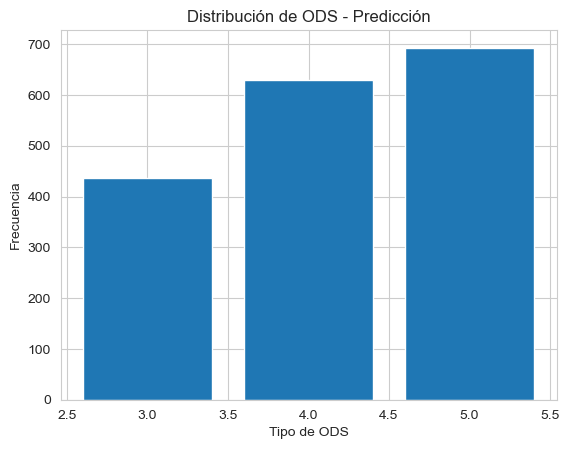

In [732]:
import matplotlib.pyplot as plt

# Contar la frecuencia de cada ODS
frecuencia_numeros = df_ods_new['sdg'].value_counts()

# Crear un histograma
plt.bar(frecuencia_numeros.index, frecuencia_numeros.values)

# Configurar etiquetas y título
plt.xlabel('Tipo de ODS')
plt.ylabel('Frecuencia')
plt.title('Distribución de ODS - Predicción')

# Mostrar el histograma
plt.show()